# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

***Loading the data***

In [ ]:
df = pd.read_csv("/content/car_data.csv")

***Finding Shape***

In [ ]:
df.shape

(804, 12)

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


***Descriptive Statistics***

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


***Finding Outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


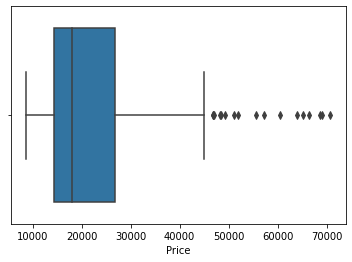

In [ ]:
import seaborn as sns 
sns.boxplot(df["Price"])

***Calculating IQR***

In [ ]:
percentile25 = df['Price'].quantile(0.25)
percentile75 = df['Price'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  14273.073870330325
75th percentile of the data is  26717.3166356619
IQR : 12444.242765331575


***Calculating Min Max Values***

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

45383.68078365926
-4393.290277667038


***Cleaning Outliers By Using Capping Technique***

In [ ]:
df['Price'] = np.where(
    df['Price']>max_value,
    max_value,
    np.where(
        df['Price']<min_value,
        min_value,
        df['Price']
    ) 
)
df['Price'].describe()

count      804.000000
mean     21099.998496
std       9031.505318
min       8638.930895
25%      14273.073870
50%      18024.995019
75%      26717.316636
max      45383.680784
Name: Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


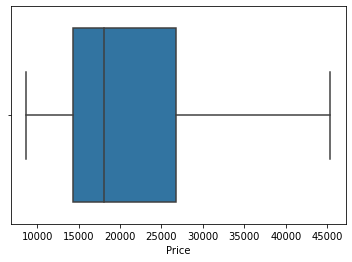

In [ ]:
sns.boxplot(df['Price'])

***Finding Outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


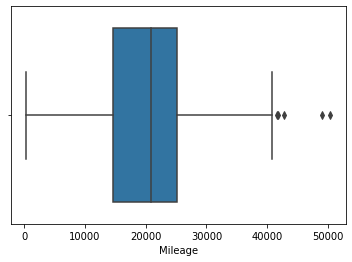

In [ ]:
sns.boxplot(df['Mileage'])

***Calculating IQR***

In [ ]:
percentile25 = df['Mileage'].quantile(0.25)
percentile75 = df['Mileage'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  14623.5
75th percentile of the data is  25213.0
IQR : 10589.5


***Calculating Min Max Values***

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

41097.25
-1260.75


***Cleaning Outliers By Using Capping Technique***

In [ ]:
df['Mileage'] = np.where(
    df['Mileage']>max_value,
    max_value,
    np.where(
        df['Mileage']<min_value,
        min_value,
        df['Mileage']
    ) 
)
df['Mileage'].describe()

count      804.000000
mean     19807.086132
std       8119.836852
min        266.000000
25%      14623.500000
50%      20913.500000
75%      25213.000000
max      41097.250000
Name: Mileage, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


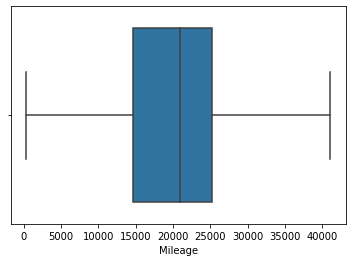

In [ ]:
sns.boxplot(df['Mileage'])

No Outliers in data.

In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.dtypes

Price       float64
Mileage     float64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

## **Tasks, Part 1**


***Checking Linear Relationship Between Mileage Feature and Price Target***

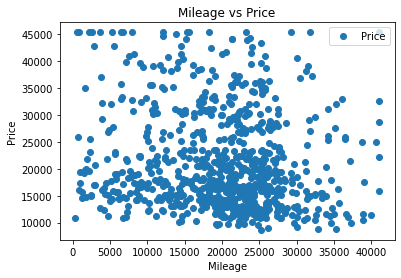

In [ ]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.138997
Price,-0.138997,1.000000


No Linear Relationship in between Mileage feature and Price target.

#**1. Find the linear regression equation for mileage vs price.**

In [ ]:
X = df[['Mileage']].values 
y = df['Price'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
m=regressor.coef_
c=regressor.intercept_
y=m*8221+c
print("y =",y)

y = [22943.03661652]


#**2. Chart the original data and the equation on the chart.**

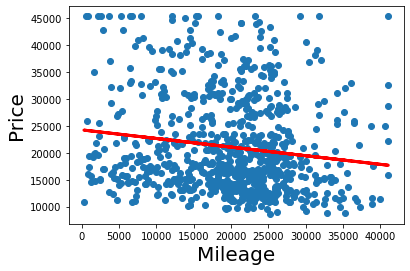

In [ ]:
plt.scatter(X,y)                     
y_new = regressor.coef_*X + regressor.intercept_            
plt.plot(X,y_new, 'r',lw=3, label='regression line') 
                                                     
plt.xlabel('Mileage', fontsize=20)      
plt.ylabel('Price', fontsize=20)       
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,14862.093870,20415.705055
1,16256.236168,20637.086504
2,15802.652861,20825.196751
3,45061.951935,22045.993870
4,12425.389171,20615.652173


#**3. Find the equation's $R^2$ score (use the `.score` method) to determine** **whether the equation is a good fit for this data. (0.8 and greater is** **considered a strong correlation.)**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.0097823826807798


**The r2 sqaure value of Mileage and price columns are 0.009.**

**There is no linear relationship in between these two columns.**

**The correlation value also not in range.Because no linear relationship.**

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.


***Checking Linear Relationship in between Cylinder feature and Price***

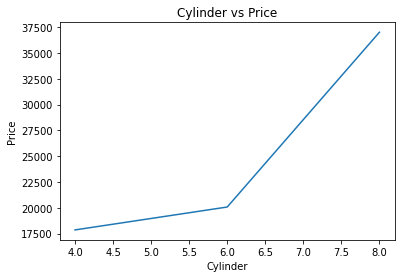

In [ ]:
df.groupby('Cylinder')['Price'].mean().plot()
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Cylinder','Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569795
Price,0.569795,1.000000


There is a Linear Relationship in between the Cylinder and Price column.

No Transformation is Required.

We will apply Linear Regression Model to this column.

***Checking Linear Relatonship in between Liter feature and Price target***

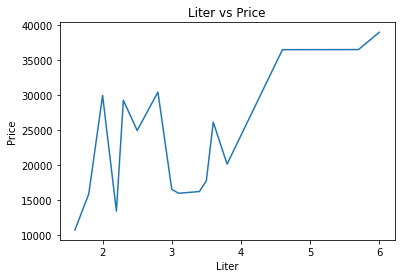

In [ ]:
df.groupby('Liter')['Price'].mean().plot()
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Liter','Price']].corr()

,Liter,Price
Liter,1.000000,0.570744
Price,0.570744,1.000000


There is a Linear Relationship in between the Liter and Price column.

No Transformation is Required.

We will apply Linear Regression Model to this column.

***Checking Linear Relationship between Doors feature and Price target***

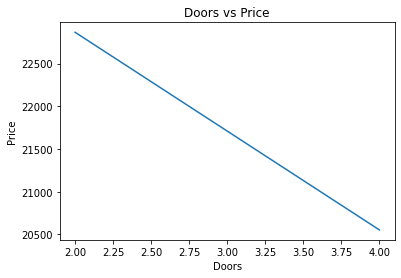

In [ ]:
df.groupby('Doors')['Price'].mean().plot()
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

There is a linear relatonship in between the Doors feature and Price target.

***Checking Linear Relationship in between Cruise feature and Price target***

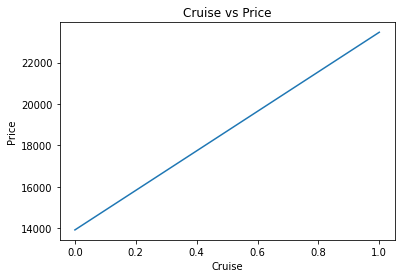

In [ ]:
df.groupby('Cruise')['Price'].mean().plot()
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Cruise','Price']].corr()

,Cruise,Price
Cruise,1.000000,0.456111
Price,0.456111,1.000000


There is a Linear Relationship in between the Cruise and Price column.

No Transformation is Required.

We will apply Linear Regression Model to this column.

***Checking Linear Relationship in between Sound feature and Price target***

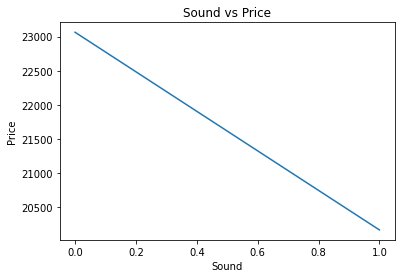

In [ ]:
df.groupby('Sound')['Price'].mean().plot()
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

There is a linear relationship in between the Sound feature and Price target.

***Checking Linear Relationship in between Leather feature and Price target***

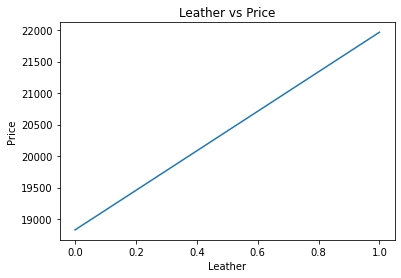

In [ ]:
df.groupby('Leather')['Price'].mean().plot()
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

There is a linear relationship in between the Leather feature and Price target.

***Splitting the data***

In [ ]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df['Price'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***Scaling the data***

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
scaler.var_

array([7.07078410e+07, 1.94949317e+00, 1.22344396e+00, 6.98610953e-01,
       1.85343295e-01, 2.14880191e-01, 2.02254692e-01])

***Model Fitting***

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

***Calculating Coefficients and Intercept***

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1224.319050
Cylinder,3379.731735
Liter,937.046535
Doors,-649.865158
Cruise,2590.789936
Sound,-1172.743808
Leather,1525.916516


In [ ]:
regressor.intercept_

21045.817902928167

#**1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [ ]:
m=regressor.coef_
c=regressor.intercept_
y=regressor.predict([[8221,6,3.1,4,1,1,1]]) #y=mx+c
print('y=',y)

y= [-10286224.99914367]


In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,14862.093870,26135.695733
1,16256.236168,23537.241555
2,15802.652861,11155.067769
3,45061.951935,31201.671975
4,12425.389171,13721.289362
...,...,...
156,18548.978593,23540.366273
157,36332.894685,32082.809025
158,21683.031464,20404.257788
159,18040.144006,30085.383325


#**2. Find the equation's $R^2$ score (use the `.score` method) to determine** **whether the equation is a good fit for this data. (0.8 and greater is** **considered a strong correlation.)**

***Evaluation Metric-R2 Square***

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.33712114610767563


**The r2square value is 0.33.**

**No feature having the correlation value 0.8.**

**The euation for this data is not good fit.**

#**3. Find the combination of the factors that is the best predictor for price.**

***Feature Selection***

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],selector.support_))

[('Mileage', True),
 ('Cylinder', True),
 ('Liter', True),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', True),
 ('Leather', True)]

In [ ]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***Selecting Important features by using Sequential Feature Selector***

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


From the above;Cylinder and Cruise combination factrors are the best predictor for price.


## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

#**1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.**

In [ ]:
df=pd.get_dummies(df,columns=["Make","Model","Trim","Type"])
df.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Se

**Selecting Dummy variables for Perticular columns**

In [ ]:
X = df[['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']].values 
y = df['Price'].values 

***Splitting***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
scaler.var_

array([0.08586791, 0.09822735, 0.23962327, 0.15081909, 0.1147179 ,
       0.07302473, 0.00310075, 0.02129888, 0.04447949, 0.03736858,
       0.02129888, 0.07433081, 0.03449035, 0.01380098, 0.01531023,
       0.06240189, 0.01076795, 0.01531023, 0.06240189, 0.02278395,
       0.03880043, 0.02573957, 0.01076795, 0.02426418, 0.03736858,
       0.03880043, 0.06508662, 0.00924419, 0.03449035, 0.02278395,
       0.06642174, 0.03159277, 0.02426418, 0.01531023, 0.01228688,
       0.01380098, 0.03304398, 0.01228688, 0.05285295, 0.14078157,
       0.07563206, 0.23728682, 0.07302473])

***Model fitting***

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

***Finding Coefficiets and Intercept***

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Make_Buick,8.414562e+15
Make_Cadillac,1.473256e+17
Make_Chevrolet,6.564590e+16
Make_Pontiac,1.930435e+16
Make_SAAB,1.222230e+17
Make_Saturn,6.070887e+15
Model_9-2X AWD,-1.969548e+15
Model_9_3,-5.161928e+15
Model_9_3 HO,-7.459564e+15
Model_9_5,-6.837334e+15


***Actual vs Predicted values***

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,14862.093870,15109.154614
1,16256.236168,18397.154614
2,15802.652861,15765.154614
3,45061.951935,42997.154614
4,12425.389171,12269.154614


***Calculating R2-Square***

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.961644834466117


**The R2 square value of make,body and type colums for this dataset is 96.16%.** 

**These columns are best fit for model**

#**2. Find the best combination of factors to predict price.**

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],selector.support_))

[('Make_Buick', False),
 ('Make_Cadillac', False),
 ('Make_Chevrolet', False),
 ('Make_Pontiac', True),
 ('Make_SAAB', False),
 ('Make_Saturn', False),
 ('Model_9-2X AWD', False),
 ('Model_9_3', False),
 ('Model_9_3 HO', False),
 ('Model_9_5', False),
 ('Model_9_5 HO', False),
 ('Model_AVEO', False),
 ('Model_Bonneville', False),
 ('Model_CST-V', False),
 ('Model_CTS', False),
 ('Model_Cavalier', False),
 ('Model_Century', False),
 ('Model_Classic', False),
 ('Model_Cobalt', False),
 ('Model_Corvette', False),
 ('Model_Deville', False),
 ('Model_G6', False),
 ('Model_GTO', True),
 ('Model_Grand Am', True),
 ('Model_Grand Prix', True),
 ('Model_Impala', False),
 ('Model_Ion', False),
 ('Model_L Series', False),
 ('Model_Lacrosse', False),
 ('Model_Lesabre', False),
 ('Model_Malibu', False),
 ('Model_Monte Carlo', False),
 ('Model_Park Avenue', False),
 ('Model_STS-V6', False),
 ('Model_STS-V8', False),
 ('Model_Sunfire', True),
 ('Model_Vibe', True),
 ('Model_XLR-V8', False),
 ('Type_Co

**Make_Pontiac,Model_GTO,Model_Grand Am,Model_Grand Prix,Model_Sunfire and Model_Vibe combination columns are best facotrs for predicting the price.**